# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import logging

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# cities_df = pd.DataFrame(cities)
# cities_df = cities_df.rename(columns={0:'City'})
# cities_df

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#set units
units = "Imperial"

#create URLs
url = "http://api.openweathermap.org/data/2.5/weather?"
weather_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info 
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

# response = requests.get(url, params= params).json()
# response = requests.get(weather_url + 'Charlotte').json()
# Loop through the list of cities and perform a request for data on each
# response

In [4]:
# Loop through the list of cities and perform a request for data on each
print('Beginning Data Retrieval')
print("-------------------------------")
for record in cities:

    response = requests.get(weather_url + record).json()
    
    try:
        print(f"Processing Record {cities.index(record)} of Set {cities.index(record)} | {record}")
        City.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        
    except (KeyError, IndexError):
        print("City not found... skipping.")

Beginning Data Retrieval
-------------------------------
Processing Record 0 of Set 0 | barrow
Processing Record 1 of Set 1 | niono
Processing Record 2 of Set 2 | hvolsvollur
Processing Record 3 of Set 3 | agogo
Processing Record 4 of Set 4 | ushuaia
Processing Record 5 of Set 5 | manicore
Processing Record 6 of Set 6 | sao miguel do araguaia
Processing Record 7 of Set 7 | tessalit
Processing Record 8 of Set 8 | husavik
Processing Record 9 of Set 9 | leh
Processing Record 10 of Set 10 | taolanaro
City not found... skipping.
Processing Record 11 of Set 11 | granadilla de abona
Processing Record 12 of Set 12 | isangel
Processing Record 13 of Set 13 | kodiak
Processing Record 14 of Set 14 | bilibino
Processing Record 15 of Set 15 | kapaa
Processing Record 16 of Set 16 | luderitz
Processing Record 17 of Set 17 | carnarvon
Processing Record 18 of Set 18 | mar del plata
Processing Record 19 of Set 19 | hobart
Processing Record 20 of Set 20 | palauig
Processing Record 21 of Set 21 | sur
Proce

Processing Record 176 of Set 176 | mahebourg
Processing Record 177 of Set 177 | gangotri
City not found... skipping.
Processing Record 178 of Set 178 | ahipara
Processing Record 179 of Set 179 | airai
Processing Record 180 of Set 180 | moroyama
Processing Record 181 of Set 181 | nikolsk
Processing Record 182 of Set 182 | tumwater
Processing Record 183 of Set 183 | kusk
City not found... skipping.
Processing Record 184 of Set 184 | bengkulu
Processing Record 185 of Set 185 | kloulklubed
Processing Record 186 of Set 186 | kenora
Processing Record 187 of Set 187 | maceio
Processing Record 188 of Set 188 | temecula
Processing Record 189 of Set 189 | stornoway
Processing Record 190 of Set 190 | meulaboh
Processing Record 191 of Set 191 | mehran
Processing Record 192 of Set 192 | upernavik
Processing Record 193 of Set 193 | tahlequah
Processing Record 194 of Set 194 | vallenar
Processing Record 195 of Set 195 | bathsheba
Processing Record 196 of Set 196 | xining
Processing Record 197 of Set 

Processing Record 354 of Set 354 | bystrogorskiy
Processing Record 355 of Set 355 | seoul
Processing Record 356 of Set 356 | dabhol
Processing Record 357 of Set 357 | leiva
Processing Record 358 of Set 358 | parrita
Processing Record 359 of Set 359 | phan thiet
Processing Record 360 of Set 360 | grand-santi
Processing Record 361 of Set 361 | kalmunai
Processing Record 362 of Set 362 | warrnambool
Processing Record 363 of Set 363 | belle fourche
Processing Record 364 of Set 364 | zhenlai
Processing Record 365 of Set 365 | nadym
Processing Record 366 of Set 366 | halalo
City not found... skipping.
Processing Record 367 of Set 367 | ancud
Processing Record 368 of Set 368 | mezen
Processing Record 369 of Set 369 | kirksville
Processing Record 370 of Set 370 | dire
Processing Record 371 of Set 371 | coahuayana
Processing Record 372 of Set 372 | harper
Processing Record 373 of Set 373 | sisimiut
Processing Record 374 of Set 374 | talnakh
Processing Record 375 of Set 375 | paducah
Processing 

Processing Record 529 of Set 529 | ajdabiya
Processing Record 530 of Set 530 | shevchenkove
Processing Record 531 of Set 531 | mayor pablo lagerenza
Processing Record 532 of Set 532 | hanzhong
Processing Record 533 of Set 533 | margate
Processing Record 534 of Set 534 | tibnah
Processing Record 535 of Set 535 | berlevag
Processing Record 536 of Set 536 | yablonovo
Processing Record 537 of Set 537 | makakilo city
Processing Record 538 of Set 538 | coulihaut
City not found... skipping.
Processing Record 539 of Set 539 | nyrob
Processing Record 540 of Set 540 | soyo
Processing Record 541 of Set 541 | manono
Processing Record 542 of Set 542 | malwan
City not found... skipping.
Processing Record 543 of Set 543 | camacha
Processing Record 544 of Set 544 | campagna
Processing Record 545 of Set 545 | suzaka
Processing Record 546 of Set 546 | kazanskaya
Processing Record 547 of Set 547 | avera
Processing Record 548 of Set 548 | benton
Processing Record 549 of Set 549 | bababe
City not found... 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create dictionary for data
weather_dict = {
    'City': City,
    'Lat': Lat,
    'Lng': Lng,
    'Max Temp' : Max_Temp,
    'Humidity' : Humidity,
    'Cloudiness': Cloudiness,
    'Wind Speed' : Wind_Speed,
    'Country' : Country,
    'Date': Date
}

#Create dataframe
weather_data = pd.DataFrame(weather_dict)

#Export to csv
weather_data.to_csv('weather_data.csv')

#Display Dataframe
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.29,-156.79,39.20,86,90,20.80,US,1595866728
1,Niono,14.25,-5.99,94.24,40,64,0.54,ML,1595866770
2,Hvolsvollur,63.75,-20.22,60.01,62,1,19.46,IS,1595866771
3,Agogo,6.80,-1.08,79.14,72,90,2.15,GH,1595866771
4,Ushuaia,-54.80,-68.30,32.00,89,90,28.86,AR,1595866771
...,...,...,...,...,...,...,...,...,...
552,Diamantino,-14.41,-56.45,92.39,21,0,7.76,BR,1595866837
553,Taoudenni,22.68,-3.98,113.11,6,36,7.96,ML,1595866837
554,Wana,32.30,69.57,87.26,38,8,7.65,PK,1595866837
555,Yangambi,0.81,24.43,82.24,62,67,0.87,CD,1595866837


In [9]:
weather_data.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#Get Describe of weather data
weather_data.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,21.125871,19.010054,71.737648,67.522442,48.630162,7.597289,1.595867e+09
std,33.239193,90.340269,14.884276,20.851866,37.886469,5.109215,6.546460e+01
min,-54.800000,-179.170000,32.000000,6.000000,0.000000,0.270000,1.595867e+09
25%,-5.900000,-58.650000,60.800000,56.000000,8.000000,3.470000,1.595867e+09
50%,26.180000,24.430000,73.990000,72.000000,46.000000,6.380000,1.595867e+09
75%,49.490000,97.320000,82.400000,83.000000,89.000000,10.290000,1.595867e+09
max,78.220000,178.420000,113.110000,100.000000,100.000000,28.860000,1.595867e+09


In [10]:
# sort by Humidity to check if any cities have Humidity > 100
weather_data = weather_data.sort_values('Humidity', ascending = False)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
104,Valdivia,-39.81,-73.25,39.20,100,90,3.36,CL,1595866783
212,Hasaki,35.73,140.83,78.01,100,75,3.36,JP,1595866796
142,Petropavlovsk-Kamchatskiy,53.05,158.65,51.80,100,36,6.71,RU,1595866788
289,North Bend,43.41,-124.22,64.00,100,90,4.70,US,1595866805
479,Prince Rupert,54.32,-130.32,55.40,100,90,2.24,CA,1595866827
...,...,...,...,...,...,...,...,...,...
500,Riyadh,24.69,46.72,105.80,14,40,5.82,SA,1595866746
380,Khāsh,28.22,61.22,85.60,12,0,12.91,IR,1595866815
256,Agadez,19.75,10.25,106.27,10,86,8.30,NE,1595866801
218,Bāfq,31.61,55.41,94.78,10,1,13.82,IR,1595866797


In [11]:
#  Get the indices of cities that have humidity over 100%.
city_data = weather_data.loc[weather_data['Humidity'] > 100, :]
city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [13]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data = weather_data
clean_city_data.to_csv('clean_city_data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

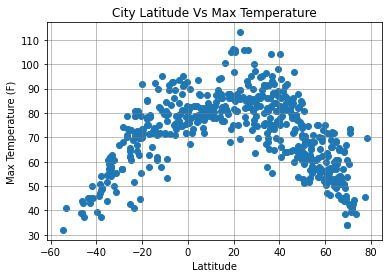

In [20]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']
plt.scatter(x_values,y_values)

#labels
plt.title("City Latitude Vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(color='gray', linestyle='-', linewidth=0.5)

plt.savefig("City Latitude Vs Max Temperature")

## Latitude vs. Humidity Plot

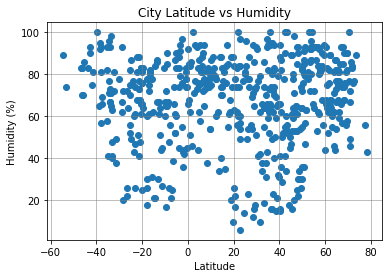

In [21]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values)

#labels
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(color='gray', linestyle='-', linewidth=0.5)

plt.savefig("City Latitude vs Humidity")

## Latitude vs. Cloudiness Plot

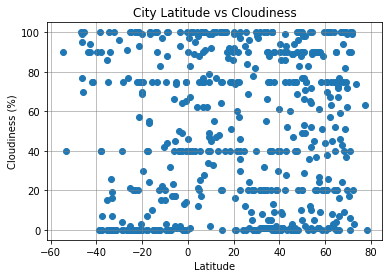

In [22]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values,y_values)

#labels
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(color='gray', linestyle='-', linewidth=0.5)

plt.savefig("City Latitude vs Cloudiness")

## Latitude vs. Wind Speed Plot

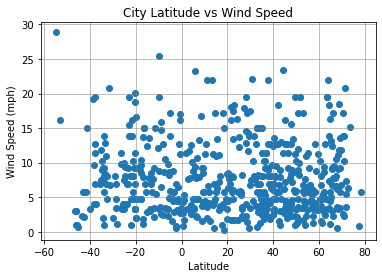

In [23]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']
plt.scatter(x_values,y_values)

#labels
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(color='gray', linestyle='-', linewidth=0.5)

plt.savefig("City Latitude vs Wind Speed")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


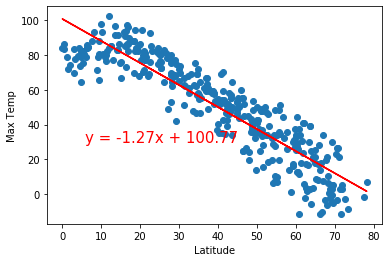

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


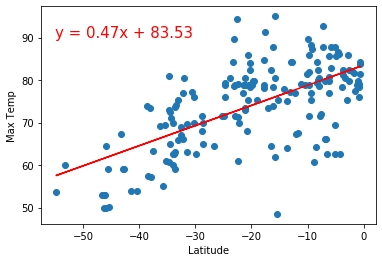

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


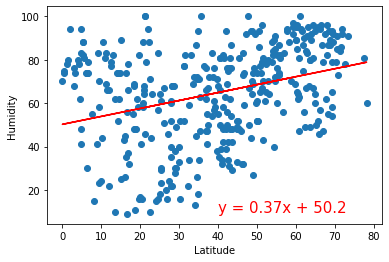

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


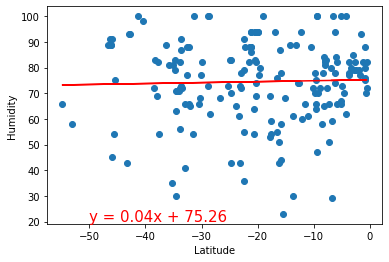

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


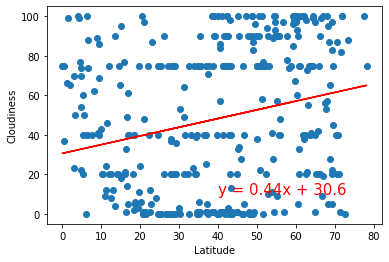

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


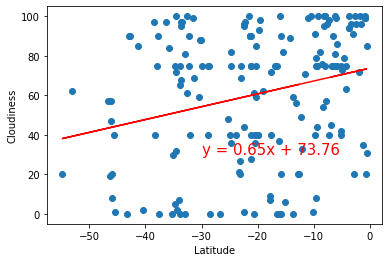

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


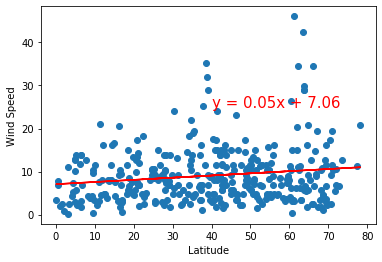

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


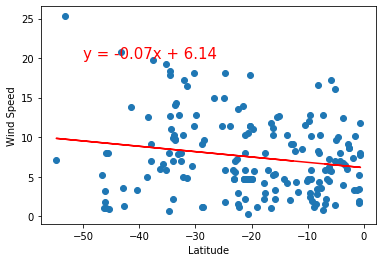